In [2]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
from matplotlib import pyplot as plt
import os

In [3]:
print(torch.cuda.is_available())

True


In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
def init_cnn(module):
    if type(module) == nn.Linear or type(module) == nn.Conv2d:
        nn.init.xavier_uniform_(module.weight)

In [6]:
class LeNet(nn.Module):
    def __init__(self, lr=0.1, num_classes=10):
        super(LeNet, self).__init__()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.Sigmoid(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.Sigmoid(),
            nn.LazyLinear(84), nn.Sigmoid(),
            nn.LazyLinear(num_classes))
    def forward(self, x):
        modelOutput = self.net(x)
        return modelOutput
    def layer_summary(self, X_shape):
        X = torch.randn(*X_shape)
        for layer in self.net:
            X = layer(X)
            print(layer.__class__.__name__, 'output shape:\t', X.shape)

In [7]:
class ModernLeNet(nn.Module):
    def __init__(self, lr=0.001, num_classes=10):
        super(ModernLeNet, self).__init__()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes))
    def forward(self, x):
        return self.net(x)
    def layer_summary(self, X_shape):
        X = torch.randn(*X_shape)
        for layer in self.net:
            X=layer(X)
            print(layer.__class__.__name__, 'output shape:\t', X.shape)

In [8]:
class ModernLeNet2(nn.Module):
    def __init__(self, lr=0.001, num_classes=10):
        super(ModernLeNet2, self).__init__()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=2, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes))
    def forward(self, x):
        return self.net(x)
    def layer_summary(self, X_shape):
        X = torch.randn(*X_shape)
        for layer in self.net:
            X=layer(X)
            print(layer.__class__.__name__, 'output shape:\t', X.shape)

In [9]:
class ModernLeNet3(nn.Module):
    def __init__(self, lr=0.001, num_classes=10):
        super(ModernLeNet3, self).__init__()
        self.net = nn.Sequential(
            nn.LazyConv2d(12, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(24, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(180), nn.ReLU(),
            nn.LazyLinear(108), nn.ReLU(),
            nn.LazyLinear(num_classes))
    def forward(self, x):
        return self.net(x)
    def layer_summary(self, X_shape):
        X = torch.randn(*X_shape)
        for layer in self.net:
            X=layer(X)
            print(layer.__class__.__name__, 'output shape:\t', X.shape)

In [10]:
class ModernLeNet4(nn.Module):
    def __init__(self, lr=0.001, num_classes=10):
        super(ModernLeNet4, self).__init__()
        self.net = nn.Sequential(
            nn.LazyConv2d(6, kernel_size=5, padding=2), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(16, kernel_size=5, padding=4), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.LazyConv2d(36, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes))
    def forward(self, x):
        return self.net(x)
    def layer_summary(self, X_shape):
        X = torch.randn(*X_shape)
        for layer in self.net:
            X=layer(X)
            print(layer.__class__.__name__, 'output shape:\t', X.shape)

In [11]:
class ModernLeNet5(nn.Module):
    def __init__(self, lr=0.001, num_classes=10):
        super(ModernLeNet5, self).__init__()
        self.net = nn.Sequential(
            nn.LazyConv2d(16, kernel_size=5), nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.LazyLinear(120), nn.ReLU(),
            nn.LazyLinear(84), nn.ReLU(),
            nn.LazyLinear(num_classes))
    def forward(self, x):
        return self.net(x)
    def layer_summary(self, X_shape):
        X = torch.randn(*X_shape)
        for layer in self.net:
            X=layer(X)
            print(layer.__class__.__name__, 'output shape:\t', X.shape)

In [12]:
model = LeNet()
model.layer_summary((1, 1, 28, 28))

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/lazy.py:180: UserWarning: Lazy modules are a new feature under heavy development so changes to the API or functionality can happen at any moment.
  warnings.warn('Lazy modules are a new feature under heavy development '


Conv2d output shape:	 torch.Size([1, 6, 28, 28])
Sigmoid output shape:	 torch.Size([1, 6, 28, 28])
AvgPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
Sigmoid output shape:	 torch.Size([1, 16, 10, 10])
AvgPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
Sigmoid output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
Sigmoid output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


In [13]:
modern_model = ModernLeNet()
modern_model.layer_summary((1,1,28,28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
ReLU output shape:	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 10, 10])
ReLU output shape:	 torch.Size([1, 16, 10, 10])
MaxPool2d output shape:	 torch.Size([1, 16, 5, 5])
Flatten output shape:	 torch.Size([1, 400])
Linear output shape:	 torch.Size([1, 120])
ReLU output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
ReLU output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


In [14]:
improved_modern_model2 = ModernLeNet3()
improved_modern_model2.layer_summary((1,1,28,28))

Conv2d output shape:	 torch.Size([1, 12, 28, 28])
ReLU output shape:	 torch.Size([1, 12, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 12, 14, 14])
Conv2d output shape:	 torch.Size([1, 24, 10, 10])
ReLU output shape:	 torch.Size([1, 24, 10, 10])
MaxPool2d output shape:	 torch.Size([1, 24, 5, 5])
Flatten output shape:	 torch.Size([1, 600])
Linear output shape:	 torch.Size([1, 180])
ReLU output shape:	 torch.Size([1, 180])
Linear output shape:	 torch.Size([1, 108])
ReLU output shape:	 torch.Size([1, 108])
Linear output shape:	 torch.Size([1, 10])


In [15]:
improved_modern_model3 = ModernLeNet4()
improved_modern_model3.layer_summary((1,1,28,28))

Conv2d output shape:	 torch.Size([1, 6, 28, 28])
ReLU output shape:	 torch.Size([1, 6, 28, 28])
MaxPool2d output shape:	 torch.Size([1, 6, 14, 14])
Conv2d output shape:	 torch.Size([1, 16, 18, 18])
ReLU output shape:	 torch.Size([1, 16, 18, 18])
MaxPool2d output shape:	 torch.Size([1, 16, 9, 9])
Conv2d output shape:	 torch.Size([1, 36, 5, 5])
ReLU output shape:	 torch.Size([1, 36, 5, 5])
MaxPool2d output shape:	 torch.Size([1, 36, 2, 2])
Flatten output shape:	 torch.Size([1, 144])
Linear output shape:	 torch.Size([1, 120])
ReLU output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
ReLU output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


In [16]:
improved_modern_model4 = ModernLeNet5()
improved_modern_model4.layer_summary((1,1,28,28))

Conv2d output shape:	 torch.Size([1, 16, 24, 24])
ReLU output shape:	 torch.Size([1, 16, 24, 24])
MaxPool2d output shape:	 torch.Size([1, 16, 12, 12])
Flatten output shape:	 torch.Size([1, 2304])
Linear output shape:	 torch.Size([1, 120])
ReLU output shape:	 torch.Size([1, 120])
Linear output shape:	 torch.Size([1, 84])
ReLU output shape:	 torch.Size([1, 84])
Linear output shape:	 torch.Size([1, 10])


In [17]:
train_data = torchvision.datasets.FashionMNIST(root='./data',
                                              train=True,
                                              transform=transforms.ToTensor(),
                                              download = True)
val_data = torchvision.datasets.FashionMNIST(root='./data',
                                            train=False,
                                            transform=transforms.ToTensor(),
                                            download=True)
train_loader = torch.utils.data.DataLoader(dataset=train_data,
                                          batch_size=100,
                                          shuffle=True, num_workers=os.cpu_count())
val_loader = torch.utils.data.DataLoader(dataset=val_data,
                                        batch_size=100,
                                        shuffle=False)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



In [18]:
model = LeNet().to(device)
modern_model = ModernLeNet().to(device)
improved_modern_model = ModernLeNet2().to(device)
improved_modern_model2 = ModernLeNet3().to(device)
improved_modern_model3 = ModernLeNet4().to(device)
improved_modern_model4 = ModernLeNet5().to(device)

In [19]:
lossCriterion = nn.CrossEntropyLoss()
optim = torch.optim.Adam(model.parameters(), lr=0.001)
optim2 = torch.optim.Adam(modern_model.parameters(), lr=0.001)
optim3 = torch.optim.Adam(improved_modern_model.parameters(), lr=0.001)
optim4 = torch.optim.Adam(improved_modern_model2.parameters(), lr=0.001)
optim5 = torch.optim.Adam(improved_modern_model3.parameters(), lr=0.001)
optim6 = torch.optim.Adam(improved_modern_model4.parameters(), lr=0.001)

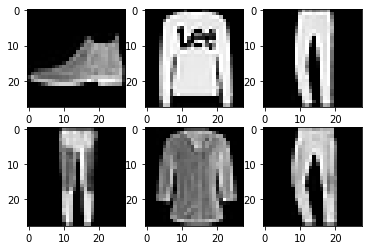

In [20]:
imageExamples = iter(val_loader)
example_data, example_targets = next(imageExamples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

In [21]:
num_epochs = 20
num_epochs = 20
valid_loss = [None] * 20
training_loss = [None] * 20
valid_acc = [None] * 20
index = 0
for epoch in range(num_epochs):
    n_correct_pred = 0
    n_samples = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = lossCriterion(outputs, labels)
        
        optim.zero_grad()
        loss.backward()
        optim.step()
        
    with torch.no_grad():
        for j, (valImages, valLabels) in enumerate(val_loader):
            valImages = valImages.to(device)
            valLabels = valLabels.to(device)
            outputs = model(valImages)
            val_loss = lossCriterion(outputs, valLabels)
            _, pred = torch.max(outputs.data, 1)
            n_samples += valLabels.size(0)
            n_correct_pred += (pred == valLabels).sum().item()
    
    val_acc = (n_correct_pred / n_samples)
    valid_loss[index] = val_loss.item()
    training_loss[index] = loss.item()
    valid_acc[index] = val_acc
    index += 1
    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], train loss: {loss.item():.4f}, val loss: {val_loss.item():.4f}, val_acc: {val_acc:.4f} %')

Epoch [2/20], train loss: 0.6101, val loss: 0.6128, val_acc: 0.7502 %
Epoch [4/20], train loss: 0.5515, val loss: 0.5413, val_acc: 0.7965 %
Epoch [6/20], train loss: 0.4130, val loss: 0.5472, val_acc: 0.8155 %
Epoch [8/20], train loss: 0.4122, val loss: 0.5024, val_acc: 0.8297 %
Epoch [10/20], train loss: 0.2697, val loss: 0.4626, val_acc: 0.8396 %
Epoch [12/20], train loss: 0.3748, val loss: 0.4271, val_acc: 0.8519 %
Epoch [14/20], train loss: 0.2366, val loss: 0.4146, val_acc: 0.8563 %
Epoch [16/20], train loss: 0.3152, val loss: 0.3988, val_acc: 0.8607 %
Epoch [18/20], train loss: 0.3092, val loss: 0.3883, val_acc: 0.8622 %
Epoch [20/20], train loss: 0.3570, val loss: 0.3545, val_acc: 0.8658 %


In [ ]:
epochs = [None]*20
for i in range(20):
  epochs[i] = i+1
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.title("Validation Accuracy/Loss and Training Loss vs No. Epochs")
plt.xlabel("Number of epochs")
plt.plot(epochs, valid_acc, label="Validation Accuracy", color="red")
plt.plot(epochs, training_loss, label="Training Loss", color="purple")
plt.plot(epochs, valid_loss, label="Validation Loss", color="Green")

plt.legend()
plt.show()

In [ ]:
num_epochs = 20
valid_loss = [None] * 20
training_loss = [None] * 20
valid_acc = [None] * 20
index = 0
for epoch in range(num_epochs):
    n_correct_pred = 0
    n_samples = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = modern_model(images)
        loss = lossCriterion(outputs, labels)
        
        optim2.zero_grad()
        loss.backward()
        optim2.step()
        
    with torch.no_grad():
        for j, (valImages, valLabels) in enumerate(val_loader):
            valImages = valImages.to(device)
            valLabels = valLabels.to(device)
            outputs = modern_model(valImages)
            val_loss = lossCriterion(outputs, valLabels)
            _, pred = torch.max(outputs.data, 1)
            n_samples += valLabels.size(0)
            n_correct_pred += (pred == valLabels).sum().item()
    
    val_acc = (n_correct_pred / n_samples)
    valid_loss[index] = val_loss.item()
    training_loss[index] = loss.item()
    valid_acc[index] = val_acc
    index += 1
    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], train loss: {loss.item():.4f}, val loss: {val_loss.item():.4f}, val_acc: {val_acc:.4f} %')

Epoch [2/20], train loss: 0.6344, val loss: 0.4320, val_acc: 83.73 %
Epoch [4/20], train loss: 0.3515, val loss: 0.3662, val_acc: 86.80 %
Epoch [6/20], train loss: 0.1531, val loss: 0.3386, val_acc: 87.56 %
Epoch [8/20], train loss: 0.2119, val loss: 0.3520, val_acc: 88.71 %
Epoch [10/20], train loss: 0.2826, val loss: 0.3452, val_acc: 89.71 %
Epoch [12/20], train loss: 0.1403, val loss: 0.3210, val_acc: 89.72 %
Epoch [14/20], train loss: 0.2123, val loss: 0.2968, val_acc: 89.75 %
Epoch [16/20], train loss: 0.2016, val loss: 0.3117, val_acc: 89.31 %
Epoch [18/20], train loss: 0.2072, val loss: 0.3009, val_acc: 89.99 %
Epoch [20/20], train loss: 0.2751, val loss: 0.2701, val_acc: 90.04 %


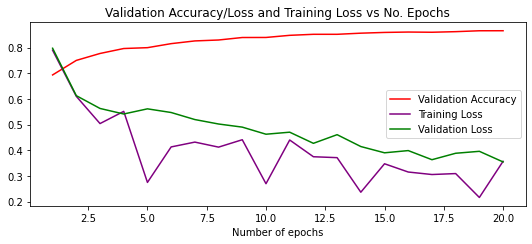

In [22]:
epochs = [None]*20
for i in range(20):
  epochs[i] = i+1
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.title("Validation Accuracy/Loss and Training Loss vs No. Epochs")
plt.xlabel("Number of epochs")
plt.plot(epochs, valid_acc, label="Validation Accuracy", color="red")
plt.plot(epochs, training_loss, label="Training Loss", color="purple")
plt.plot(epochs, valid_loss, label="Validation Loss", color="Green")

plt.legend()
plt.show()

In [23]:
num_epochs = 20
valid_loss = [None] * 20
training_loss = [None] * 20
valid_acc = [None] * 20
index = 0
for epoch in range(num_epochs):
    n_correct_pred = 0
    n_samples = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = improved_modern_model(images)
        loss = lossCriterion(outputs, labels)
        
        optim3.zero_grad()
        loss.backward()
        optim3.step()
        
    with torch.no_grad():
        for j, (valImages, valLabels) in enumerate(val_loader):
            valImages = valImages.to(device)
            valLabels = valLabels.to(device)
            outputs = improved_modern_model(valImages)
            val_loss = lossCriterion(outputs, valLabels)
            _, pred = torch.max(outputs.data, 1)
            n_samples += valLabels.size(0)
            n_correct_pred += (pred == valLabels).sum().item()
    
    val_acc = (n_correct_pred / n_samples)
    valid_loss[index] = val_loss.item()
    training_loss[index] = loss.item()
    valid_acc[index] = val_acc
    index += 1
    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], train loss: {loss.item():.4f}, val loss: {val_loss.item():.4f}, val_acc: {val_acc:.4f} %')

Epoch [2/20], train loss: 0.5335, val loss: 0.4469, val_acc: 0.8585 %
Epoch [4/20], train loss: 0.3919, val loss: 0.3545, val_acc: 0.8828 %
Epoch [6/20], train loss: 0.2479, val loss: 0.2889, val_acc: 0.8909 %
Epoch [8/20], train loss: 0.1753, val loss: 0.2821, val_acc: 0.8933 %
Epoch [10/20], train loss: 0.1830, val loss: 0.2915, val_acc: 0.9008 %
Epoch [12/20], train loss: 0.1980, val loss: 0.2676, val_acc: 0.9020 %
Epoch [14/20], train loss: 0.2021, val loss: 0.2506, val_acc: 0.9031 %
Epoch [16/20], train loss: 0.2385, val loss: 0.3326, val_acc: 0.9024 %
Epoch [18/20], train loss: 0.1980, val loss: 0.2741, val_acc: 0.9094 %
Epoch [20/20], train loss: 0.2235, val loss: 0.3457, val_acc: 0.9095 %


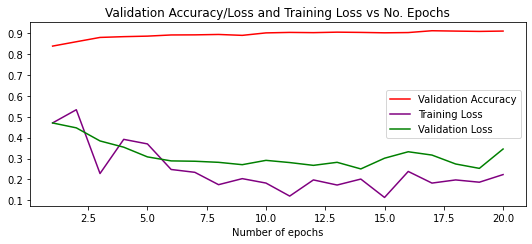

In [24]:
epochs = [None]*20
for i in range(20):
  epochs[i] = i+1
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.title("Validation Accuracy/Loss and Training Loss vs No. Epochs")
plt.xlabel("Number of epochs")
plt.plot(epochs, valid_acc, label="Validation Accuracy", color="red")
plt.plot(epochs, training_loss, label="Training Loss", color="purple")
plt.plot(epochs, valid_loss, label="Validation Loss", color="Green")

plt.legend()
plt.show()

In [25]:
num_epochs = 20
valid_loss = [None] * 20
training_loss = [None] * 20
valid_acc = [None] * 20
index = 0
for epoch in range(num_epochs):
    n_correct_pred = 0
    n_samples = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = improved_modern_model2(images)
        loss = lossCriterion(outputs, labels)
        
        optim4.zero_grad()
        loss.backward()
        optim4.step()
        
    with torch.no_grad():
        for j, (valImages, valLabels) in enumerate(val_loader):
            valImages = valImages.to(device)
            valLabels = valLabels.to(device)
            outputs = improved_modern_model2(valImages)
            val_loss = lossCriterion(outputs, valLabels)
            _, pred = torch.max(outputs.data, 1)
            n_samples += valLabels.size(0)
            n_correct_pred += (pred == valLabels).sum().item()
    
    val_acc = (n_correct_pred / n_samples)
    valid_loss[index] = val_loss.item()
    training_loss[index] = loss.item()
    valid_acc[index] = val_acc
    index += 1
    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], train loss: {loss.item():.4f}, val loss: {val_loss.item():.4f}, val_acc: {val_acc:.4f} %')

Epoch [2/20], train loss: 0.3810, val loss: 0.4066, val_acc: 0.8594 %
Epoch [4/20], train loss: 0.3907, val loss: 0.3934, val_acc: 0.8864 %
Epoch [6/20], train loss: 0.2175, val loss: 0.3477, val_acc: 0.8952 %
Epoch [8/20], train loss: 0.2690, val loss: 0.3659, val_acc: 0.9029 %
Epoch [10/20], train loss: 0.2877, val loss: 0.2854, val_acc: 0.9101 %
Epoch [12/20], train loss: 0.1745, val loss: 0.3139, val_acc: 0.9062 %
Epoch [14/20], train loss: 0.1975, val loss: 0.2925, val_acc: 0.9096 %
Epoch [16/20], train loss: 0.1554, val loss: 0.2377, val_acc: 0.9122 %
Epoch [18/20], train loss: 0.1186, val loss: 0.2674, val_acc: 0.9116 %
Epoch [20/20], train loss: 0.1337, val loss: 0.3273, val_acc: 0.9025 %


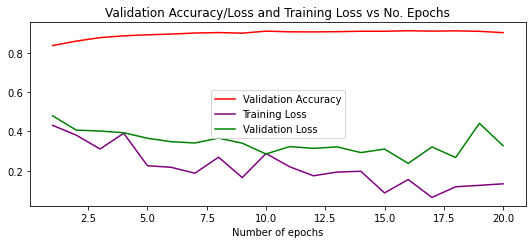

In [26]:
epochs = [None]*20
for i in range(20):
  epochs[i] = i+1
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.title("Validation Accuracy/Loss and Training Loss vs No. Epochs")
plt.xlabel("Number of epochs")
plt.plot(epochs, valid_acc, label="Validation Accuracy", color="red")
plt.plot(epochs, training_loss, label="Training Loss", color="purple")
plt.plot(epochs, valid_loss, label="Validation Loss", color="Green")

plt.legend()
plt.show()

In [ ]:
num_epochs = 20
valid_loss = [None] * 20
training_loss = [None] * 20
valid_acc = [None] * 20
index = 0
for epoch in range(num_epochs):
    n_correct_pred = 0
    n_samples = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = improved_modern_model3(images)
        loss = lossCriterion(outputs, labels)
        
        optim5.zero_grad()
        loss.backward()
        optim5.step()
        
    with torch.no_grad():
        for j, (valImages, valLabels) in enumerate(val_loader):
            valImages = valImages.to(device)
            valLabels = valLabels.to(device)
            outputs = improved_modern_model3(valImages)
            val_loss = lossCriterion(outputs, valLabels)
            _, pred = torch.max(outputs.data, 1)
            n_samples += valLabels.size(0)
            n_correct_pred += (pred == valLabels).sum().item()
    
    val_acc = (n_correct_pred / n_samples)
    valid_loss[index] = val_loss.item()
    training_loss[index] = loss.item()
    valid_acc[index] = val_acc
    index += 1
    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], train loss: {loss.item():.4f}, val loss: {val_loss.item():.4f}, val_acc: {val_acc:.4f} %')

Epoch [2/20], train loss: 0.3330, val loss: 0.4105, val_acc: 84.32 %
Epoch [4/20], train loss: 0.4486, val loss: 0.3279, val_acc: 86.39 %
Epoch [6/20], train loss: 0.2483, val loss: 0.2779, val_acc: 87.76 %
Epoch [8/20], train loss: 0.1477, val loss: 0.3296, val_acc: 89.50 %
Epoch [10/20], train loss: 0.2757, val loss: 0.3009, val_acc: 89.73 %
Epoch [12/20], train loss: 0.1195, val loss: 0.2890, val_acc: 89.98 %
Epoch [14/20], train loss: 0.2284, val loss: 0.2472, val_acc: 89.99 %
Epoch [16/20], train loss: 0.1174, val loss: 0.2651, val_acc: 90.25 %
Epoch [18/20], train loss: 0.1804, val loss: 0.2754, val_acc: 90.45 %
Epoch [20/20], train loss: 0.1136, val loss: 0.2591, val_acc: 90.66 %


In [ ]:
epochs = [None]*10
for i in range(10):
  epochs[i] = i+1
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.title("Validation Accuracy/Loss and Training Loss vs No. Epochs")
plt.xlabel("Number of epochs")
plt.plot(epochs, valid_acc, label="Validation Accuracy", color="red")
plt.plot(epochs, training_loss, label="Training Loss", color="purple")
plt.plot(epochs, valid_loss, label="Validation Loss", color="Green")

plt.legend()
plt.show()

In [ ]:
num_epochs = 20
valid_loss = [None] * 20
training_loss = [None] * 20
valid_acc = [None] * 20
index = 0
for epoch in range(num_epochs):
    n_correct_pred = 0
    n_samples = 0
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = improved_modern_model4(images)
        loss = lossCriterion(outputs, labels)
        
        optim6.zero_grad()
        loss.backward()
        optim6.step()
        
    with torch.no_grad():
        for j, (valImages, valLabels) in enumerate(val_loader):
            valImages = valImages.to(device)
            valLabels = valLabels.to(device)
            outputs = improved_modern_model4(valImages)
            val_loss = lossCriterion(outputs, valLabels)
            _, pred = torch.max(outputs.data, 1)
            n_samples += valLabels.size(0)
            n_correct_pred += (pred == valLabels).sum().item()
    
    val_acc = (n_correct_pred / n_samples)
    valid_loss[index] = val_loss.item()
    training_loss[index] = loss.item()
    valid_acc[index] = val_acc
    index += 1
    if (epoch+1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], train loss: {loss.item():.4f}, val loss: {val_loss.item():.4f}, val_acc: {val_acc:.4f} %')

Epoch [2/20], train loss: 0.3079, val loss: 0.3729, val_acc: 87.57 %
Epoch [4/20], train loss: 0.4120, val loss: 0.3009, val_acc: 88.75 %
Epoch [6/20], train loss: 0.1529, val loss: 0.2737, val_acc: 89.85 %
Epoch [8/20], train loss: 0.2285, val loss: 0.2645, val_acc: 90.40 %
Epoch [10/20], train loss: 0.1514, val loss: 0.2765, val_acc: 90.47 %
Epoch [12/20], train loss: 0.1463, val loss: 0.2840, val_acc: 90.83 %
Epoch [14/20], train loss: 0.1003, val loss: 0.3296, val_acc: 91.23 %
Epoch [16/20], train loss: 0.0318, val loss: 0.2952, val_acc: 91.69 %
Epoch [18/20], train loss: 0.1161, val loss: 0.3612, val_acc: 91.19 %
Epoch [20/20], train loss: 0.0464, val loss: 0.4069, val_acc: 91.32 %


In [ ]:
epochs = [None]*10
for i in range(10):
  epochs[i] = i+1
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.title("Validation Accuracy/Loss and Training Loss vs No. Epochs")
plt.xlabel("Number of epochs")
plt.plot(epochs, valid_acc, label="Validation Accuracy", color="red")
plt.plot(epochs, training_loss, label="Training Loss", color="purple")
plt.plot(epochs, valid_loss, label="Validation Loss", color="Green")

plt.legend()
plt.show()